In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("results.csv")

In [3]:
df.shape

(11290, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          11287 non-null  object
 1   Price         11290 non-null  object
 2   Location      11290 non-null  object
 3   Fuel Type     11290 non-null  object
 4   Transmission  11290 non-null  object
 5   Kms Driven    11290 non-null  int64 
 6   Year          11290 non-null  int64 
 7   Company Name  11290 non-null  object
dtypes: int64(2), object(6)
memory usage: 705.8+ KB


In [5]:
df.isnull().sum()

Name            3
Price           0
Location        0
Fuel Type       0
Transmission    0
Kms Driven      0
Year            0
Company Name    0
dtype: int64

In [6]:
df[df['Name'].isnull()]

,Name,Price,Location,Fuel Type,Transmission,Kms Driven,Year,Company Name
518,NaN,2.45 Lakh,new delhi,Petrol,Manual,30000,2009,Ambassador
4894,NaN,50000,pune,Petrol,Manual,50000,2003,OpelCorsa
5051,NaN,40000,pune,Petrol,Manual,50000,2003,OpelCorsa


In [7]:
df.describe(include='all')

,Name,Price,Location,Fuel Type,Transmission,Kms Driven,Year,Company Name
count,11287,11290,11290,11290,11290,1.129000e+04,11290.000000,11290
unique,312,1470,6,5,2,NaN,NaN,32
top,City,4.25 Lakh,new delhi,Petrol,Manual,NaN,NaN,Maruti
freq,633,120,3585,6604,7398,NaN,NaN,2564
mean,NaN,NaN,NaN,NaN,NaN,5.641735e+04,2015.535252,NaN
std,NaN,NaN,NaN,NaN,NaN,1.256699e+05,3.669614,NaN
min,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1990.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000e+04,2013.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.047700e+04,2016.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.205100e+04,2018.000000,NaN


Observations:
- 3 Null Values in Name
- Need to convert Price data type from string to float
- Some Outliers are present

## Data Preprocessing

In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [9]:
#Convert price to float

df['Price'] = df['Price'].astype(str)
price = []
for i in range(len(df['Price'])):
    l = df['Price'][i].split(' ')
    p = l[0]
    if(len(l)==2):
        u = l[1]
        if u=='Lakh':
            p = float(p) * 100000
        elif u=='Cr':
            p = float(p) * 10000000
    price.append(int(p))
df['Price'] = '0'
df['Price']= df['Price'].astype(float)
df['Price'] = price


In [10]:
df.dtypes

Name            object
Price            int64
Location        object
Fuel Type       object
Transmission    object
Kms Driven       int64
Year             int64
Company Name    object
dtype: object

In [11]:
cat_feat = ['Name','Location','Fuel Type','Transmission','Year','Company Name']
for i in cat_feat:
    print(df[i].value_counts(),'\n')

City            633
i20             463
Creta           388
Wagon R         387
Swift Dzire     295
               ... 
Aria              1
X-Trail           1
S 80              1
AMG GLA 35        1
Sail              1
Name: Name, Length: 312, dtype: int64 

new delhi    3584
mumbai       2964
bangalore    1740
pune         1059
hyderabad    1039
chennai       901
Name: Location, dtype: int64 

Petrol      6601
Diesel      4305
CNG          327
Electric      36
LPG           18
Name: Fuel Type, dtype: int64 

Manual       7395
Automatic    3892
Name: Transmission, dtype: int64 

2017    1375
2018    1271
2016    1173
2015    1139
2019     981
2014     941
2013     798
2020     692
2012     629
2021     606
2011     492
2010     354
2009     210
2008     154
2022     145
2007     135
2006      68
2005      32
2004      31
2003      23
2002      16
2001       9
2000       5
1996       2
1992       2
1999       1
1990       1
1998       1
1997       1
Name: Year, dtype: int64 

Maruti   

In [12]:
df = df[df['Year']>2007] # remove cars older than 2007

In [13]:
df.shape

(10960, 8)

## EDA

In [14]:
df.dtypes

Name            object
Price            int64
Location        object
Fuel Type       object
Transmission    object
Kms Driven       int64
Year             int64
Company Name    object
dtype: object

In [15]:
num_feat = ['Price','Kms Driven']
cat_feat = ['Name','Location','Fuel Type','Transmission','Year', 'Company Name']

In [16]:
df['Price']

0         532000
1         778000
2         688000
3         582000
4         495000
          ...   
11282     355000
11283     400000
11284     375000
11285     650000
11286    3040000
Name: Price, Length: 10960, dtype: int64

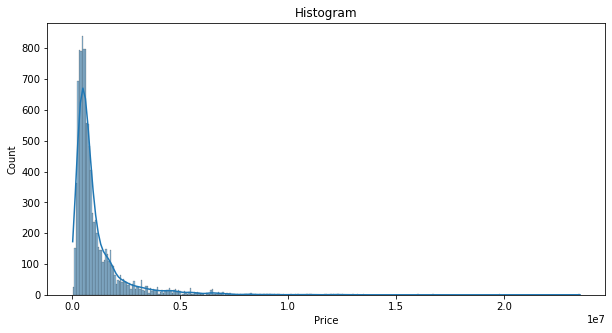

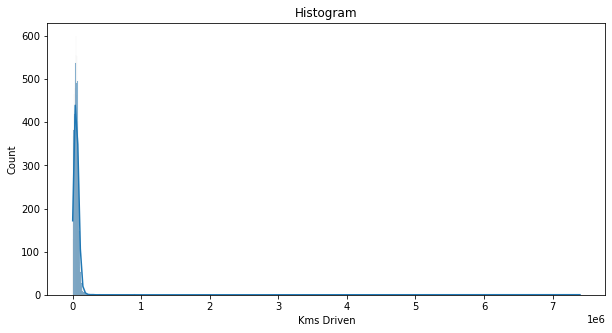

In [17]:
for i in num_feat:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i],kde=True,palette="viridis")
    plt.title("Histogram")
    plt.show()

In [18]:
print("Mean Price: ",df['Price'].mean())
print("Mode Price: ",df['Price'].mode())
print("Mean Kms Driven: ",df['Kms Driven'].mean())
print("Mode Kms Driven: ",df['Kms Driven'].mode())

Mean Price:  1108370.4943430657
Mode Price:  0    425000
dtype: int64
Mean Kms Driven:  55455.048175182485
Mode Kms Driven:  0    65000
dtype: int64


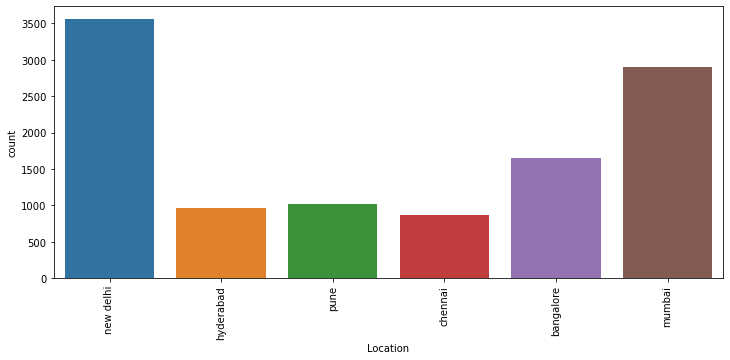

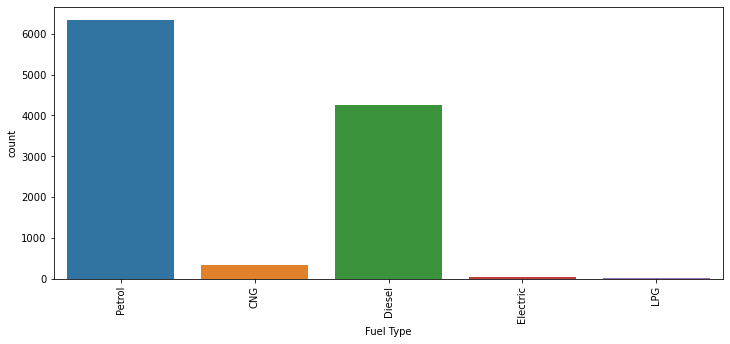

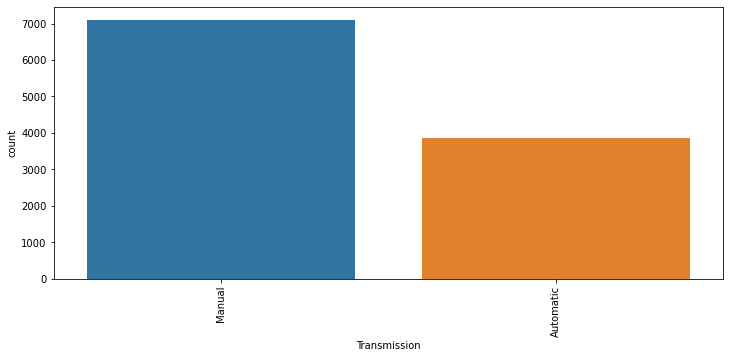

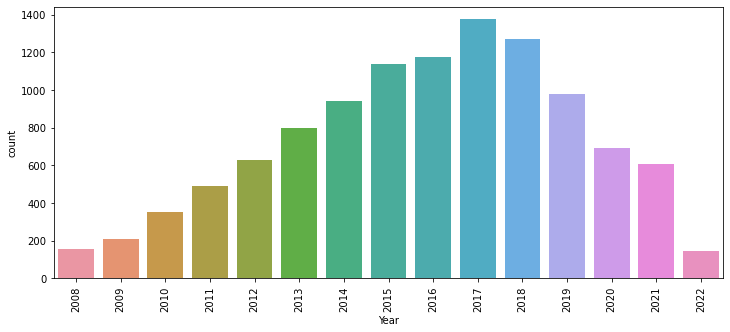

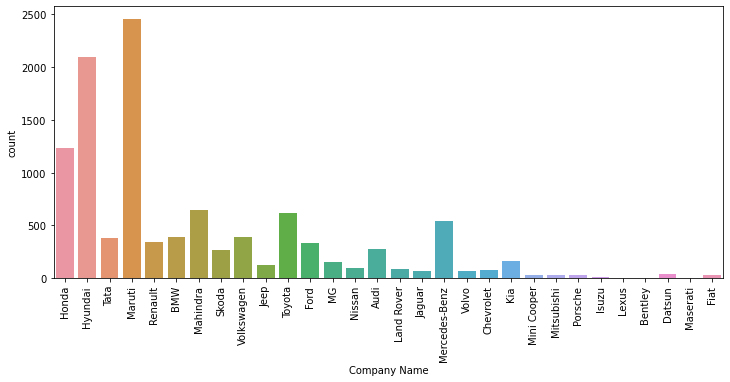

In [19]:
for i in cat_feat[1:]:
    plt.figure(figsize=(12,5))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

Observations:
- Delhi and Mumbai together account for more than 58% of used car sales
- Petrol cars have the highest quantity to be listed for sale, as petrol have an extra benefit compared to Diesel - it can be converted to run on CNG, which is almost 30% cheaper than petrol and diesel and cleaner for the environment.
- Manual Transmission is abundant as the cars tend to be cheaper which makes sense for the indian market  
- Most of the cars being sold are from 2015 to 2019
- Out of the 11k cars, Maruti suzuki and Hyundai are the most used car companies which has been put up for sale, indicating high penetration in the indian market compared to its rivals.

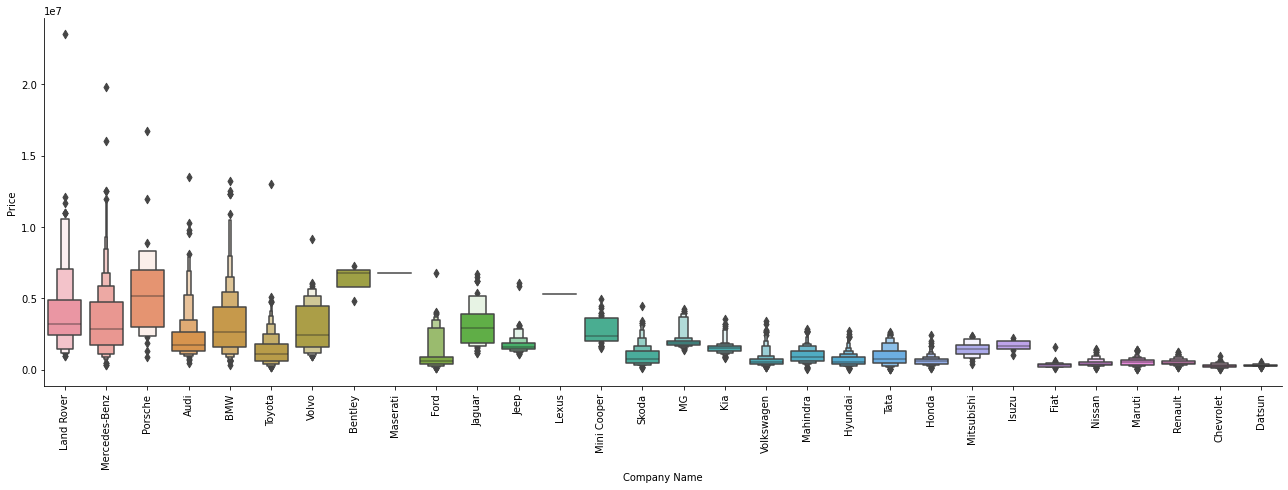

In [20]:
sns.catplot(y = "Price", x = "Company Name", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation=90)
plt.show()

Observation:
- We can see majority of the companies have outlier prices.
- Luxurious brands will logically be expensive than commercial car brands, like Mercedes-Benz is the one of the most expensive luxury car company in the world.


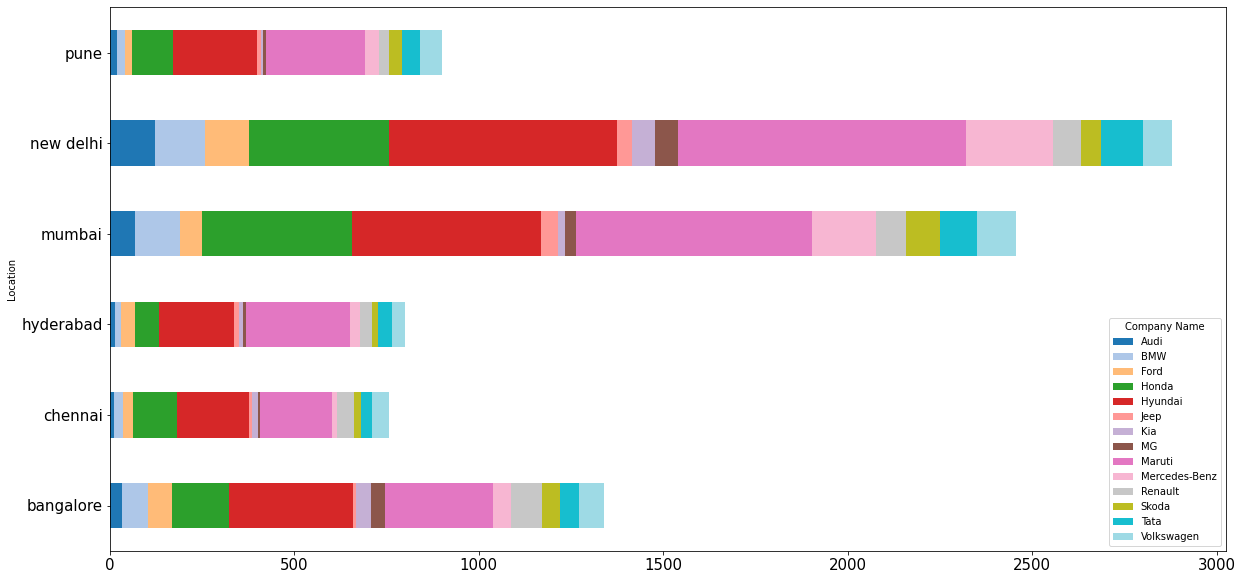

In [21]:
df_temp = df[df['Company Name'].isin(['Maruti' , 'Hyundai','Honda','Mahindra' 'Toyota', 'Mercedes-Benz',
                                    'Tata', 'BMW', 'Volkswagen', 'Ford', 'Renault', 'Skoda', 'Audi', 'Kia', 'MG', 'Jeep'])]
pd.crosstab(df_temp['Location'], df_temp['Company Name']).plot(
    kind='barh', stacked=True, figsize=(20, 10), fontsize=15, colormap="tab20")
plt.show()


Obseravation:
- In Pune, Delhi, Mumbai, hyderabad Maruti has highest market share
- In Chennai, Banglore Hyundai has highest market share


<AxesSubplot:xlabel='Kms Driven', ylabel='Price'>

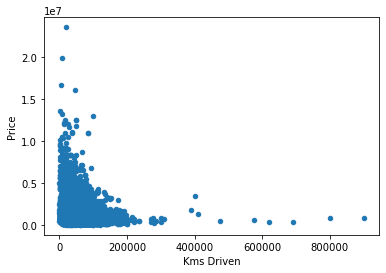

In [22]:
df1 = df[df["Kms Driven"]<1000000]
df1.plot.scatter(y="Price",x="Kms Driven")

Obseravtion:
- As the Kms Driven increases price of the car decreases.

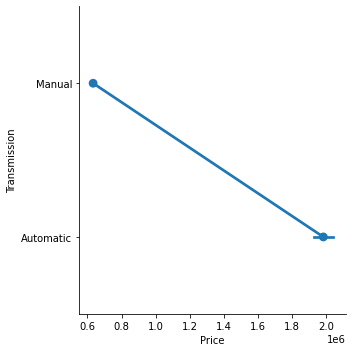

In [23]:
sns.catplot(kind="point",x="Price",y="Transmission",data=df)

Observation:
- Automatic cars are more expensive than manual ones.

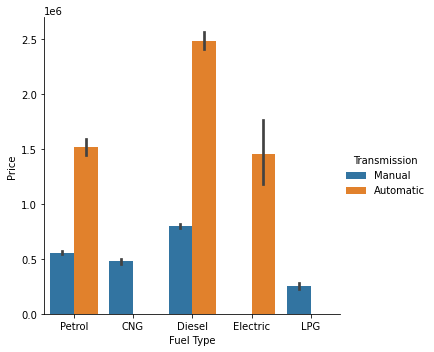

In [24]:
sns.catplot(kind="bar",y="Price",x="Fuel Type",hue="Transmission",data=df)

Observation:
- Diesel cars with automatic transmission are most expensive. 
- Electric cars only have automatic transmission.
- CNG and LPG only have manual transmission and these cars are cheapest to buy.

## Data Transformation

In [25]:
num_df=df[num_feat]

### Checking Outliers


In [26]:
z = np.abs(zscore(num_df))
z.shape

(10960, 2)

In [27]:
threshold = 3
print(np.where(z>3))

(array([  304,   346,   352,   411,   449,   459,   462,   463,   466,
         502,   546,   647,   666,   715,   742,   790,   791,   794,
         819,   820,   822,   831,  1077,  1096,  1124,  1127,  1147,
        1158,  1182,  1190,  1192,  1201,  1260,  1287,  1288,  1304,
        1365,  1379,  1381,  1391,  1422,  1457,  1474,  1515,  1518,
        1554,  1612,  1677,  1697,  1773,  1774,  1775,  1779,  1780,
        1802,  1813,  1917,  1929,  1953,  1955,  1982,  1986,  1989,
        1990,  1993,  2000,  2013,  2041,  2075,  2114,  2164,  2188,
        2198,  2245,  2247,  2274,  2289,  2338,  2377,  2382,  2414,
        2417,  2420,  2425,  2449,  2513,  2531,  2546,  2580,  2602,
        2607,  2608,  2610,  2611,  2626,  2631,  2636,  2648,  2712,
        2798,  2882,  2964,  2969,  3010,  3064,  3065,  3177,  3188,
        3387,  3395,  3470,  3481,  3500,  3502,  3521,  3530,  3571,
        3572,  3573,  3574,  3575,  3576,  3904,  3905,  3983,  4101,
        4148,  4153

In [28]:
df_new=df[(z<3).all(axis=1)]

In [29]:
df_new.shape, df.shape

((10700, 8), (10960, 8))

In [30]:
(10960-10700)*100/10960 

2.372262773722628

2.37% data loss

## Encoding

In [31]:
cat_feat.remove('Year')

In [32]:
leName=LabelEncoder()
leLocation=LabelEncoder()
leFuel=LabelEncoder()
leTransmission=LabelEncoder()
leCompany=LabelEncoder()


df_new['Name'] = leName.fit_transform(df_new['Name'])   
df_new['Location'] = leLocation.fit_transform(df_new['Location'])   
df_new['Fuel Type'] = leFuel.fit_transform(df_new['Fuel Type'])   
df_new['Transmission'] = leTransmission.fit_transform(df_new['Transmission'])   
df_new['Company Name'] = leCompany.fit_transform(df_new['Company Name'])
df_new



,Name,Price,Location,Fuel Type,Transmission,Kms Driven,Year,Company Name
0,28,532000,4,4,1,18538,2018,7
1,237,778000,4,4,1,34427,2016,8
2,158,688000,4,4,1,56591,2017,24
3,240,582000,4,0,1,23261,2020,16
4,60,495000,4,4,0,12665,2018,16
...,...,...,...,...,...,...,...,...
11282,193,355000,3,0,1,74000,2013,16
11283,78,400000,3,1,1,80000,2011,3
11284,64,375000,3,4,1,66294,2013,7
11285,132,650000,3,4,1,50092,2017,7


## Splitting Dataset

In [33]:
x=df_new.drop("Price",axis=1)
y=df_new["Price"]

In [34]:
sc=StandardScaler()
sc.fit(x)
xs = sc.transform(x)
print(x)
print(xs)

       Name  Location  Fuel Type  Transmission  Kms Driven  Year  Company Name
0        28         4          4             1       18538  2018             7
1       237         4          4             1       34427  2016             8
2       158         4          4             1       56591  2017            24
3       240         4          0             1       23261  2020            16
4        60         4          4             0       12665  2018            16
...     ...       ...        ...           ...         ...   ...           ...
11282   193         3          0             1       74000  2013            16
11283    78         3          1             1       80000  2011             3
11284    64         3          4             1       66294  2013             7
11285   132         3          4             1       50092  2017             7
11286   180         3          1             0       48000  2014            13

[10700 rows x 7 columns]
[[-1.38695945  0.76700965 

<AxesSubplot:>

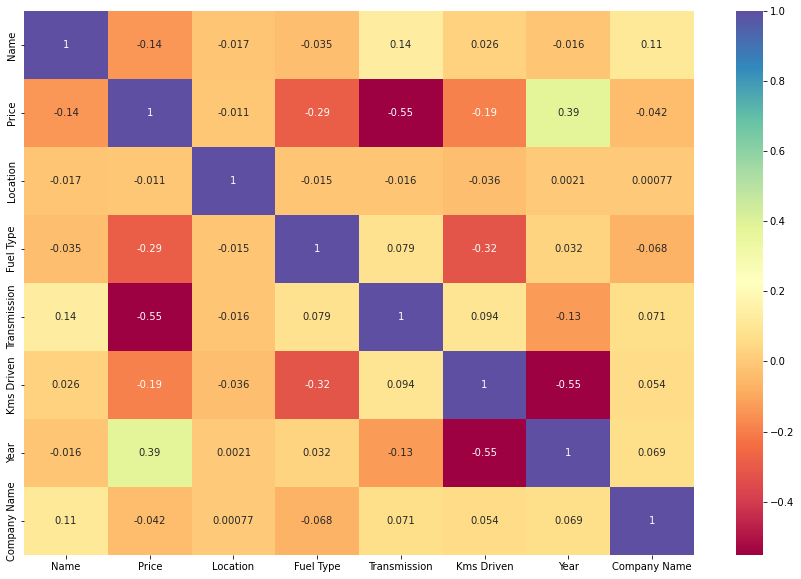

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,cmap="Spectral")

No multicollinearity found

## Models

In [36]:

X_train, X_test, y_train, y_test = train_test_split(
    xs, y, test_size=0.2, random_state=2, shuffle=True)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

rscore = r2_score(y_test, y_pred)
print(rscore)
cvscore=cross_val_score(lr,xs,y,cv=5)
print("Cross Val score : ",cvscore.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.45517545648342805
Cross Val score :  45.81032843193405
MAE: 437124.5473372726
MSE: 418880411374.96716
RMSE: 647209.7120524129


In [37]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
rscore = r2_score(y_test, y_pred)
print(rscore)
cvscore=cross_val_score(svr,xs,y,cv=5)
print("Cross Val score : ",cvscore.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

-0.1120118434817372
Cross Val score :  -12.409273323803287
MAE: 534441.0744392527
MSE: 854954102186.6564
RMSE: 924637.2814172357


In [38]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

rscore = r2_score(y_test, y_pred)
print(rscore)
cvscore=cross_val_score(ls,xs,y,cv=5)
print("Cross Val score : ",cvscore.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.45517554016711614
Cross Val score :  45.81036944898248
MAE: 437124.0463474348
MSE: 418880347035.983
RMSE: 647209.662347514


In [39]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

rscore = r2_score(y_test, y_pred)
print(rscore)
cvscore=cross_val_score(dtr,xs,y,cv=5)
print("Cross Val score : ",cvscore.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8633141438877979
Cross Val score :  83.7413885706348
MAE: 147226.3164330218
MSE: 105088928754.68864
RMSE: 324174.22592594963


In [40]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

rscore = r2_score(y_test, y_pred)
print(rscore)
cvscore=cross_val_score(rfr,xs,y,cv=5)
print("Cross Val score : ",cvscore.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9063103623830456
Cross Val score :  90.22928683696311
MAE: 131321.24945421115
MSE: 72031912683.77164
RMSE: 268387.61648737005


In [41]:
from xgboost import XGBRegressor

xbr = XGBRegressor()
xbr.fit(X_train, y_train)
y_pred = xbr.predict(X_test)

rscore = r2_score(y_test, y_pred)
print(rscore)
cvscore=cross_val_score(xbr,xs,y,cv=5)
print("Cross Val score : ",cvscore.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.9427671584810944
Cross Val score :  92.70704772687732
MAE: 116069.34626898365
MSE: 44002636233.78462
RMSE: 209768.05341563481


In [42]:
import anvil.server

anvil.server.connect("OMES34BDHMUEJ7G574WFFWD7-BSTLJVATVBWKAFJB")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [43]:
@anvil.server.callable
def predict(name,location,fuel,transmission,kms,year,company):
    name = name + " "
    kms = int(kms)
    year = int(year)
    predict_df = pd.DataFrame({'Name':name,'Location':location,'Fuel Type':fuel,'Transmission':transmission,'Kms Driven':kms,'Year':year,'Company Name':company}, index=[0])
    predict_df['Name'] = leName.transform(predict_df['Name'])   
    predict_df['Location'] = leLocation.transform(predict_df['Location'])   
    predict_df['Fuel Type'] = leFuel.transform(predict_df['Fuel Type'])   
    predict_df['Transmission'] = leTransmission.transform(predict_df['Transmission'])   
    predict_df['Company Name'] = leCompany.transform(predict_df['Company Name']) 
    trans_record = sc.transform(predict_df)
    predicted_price = xbr.predict(trans_record)
    return predicted_price

anvil.server.wait_forever()